In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
order_data = pd.read_csv("/Users/thenning/Documents/GitHub/Neurobubbles/orders_pilot1.csv")
round_data = pd.read_csv("/Users/thenning/Documents/GitHub/Neurobubbles/rounds_2024-02-20.csv")
payments_data = pd.read_csv("/Users/thenning/Documents/GitHub/Neurobubbles/payment_2024-02-20.csv")

In [17]:
subjects = np.unique(payments_data['participant'])

## Basic Plots

## Payments per subject

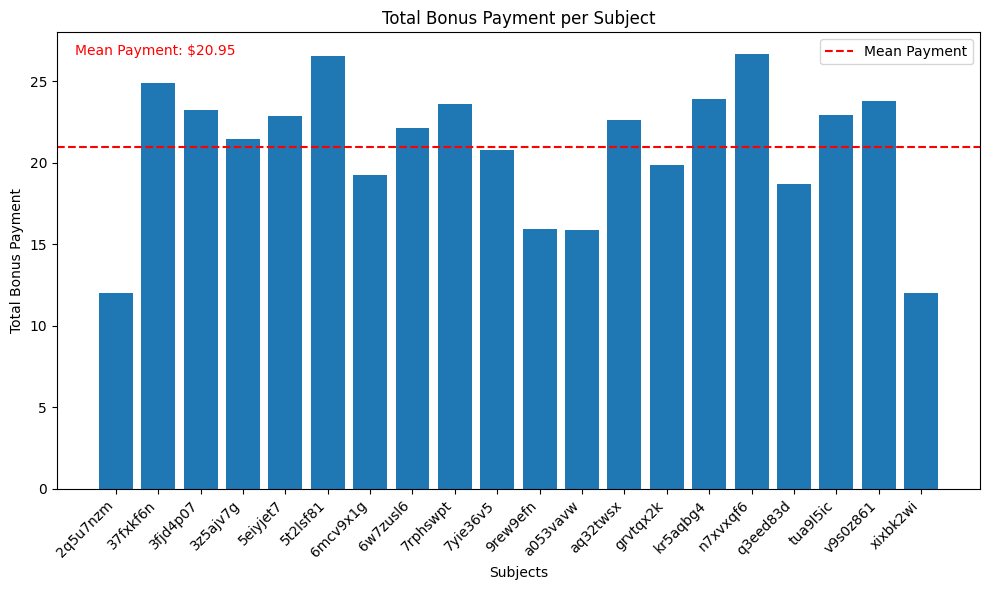

In [24]:
mean_payment = np.mean(payments_data['bonus_plus_show'])
plt.figure(figsize=(10, 6))
plt.bar(subjects, payments_data['bonus_plus_show'])
plt.xlabel('Subjects')
plt.ylabel('Total Bonus Payment')
plt.title('Total Bonus Payment per Subject')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.axhline(mean_payment, color='red', linestyle='--', label='Mean Payment')
plt.legend()
plt.text(0.02, 0.95, f'Mean Payment: ${mean_payment:.2f}', transform=plt.gca().transAxes, color='red')
plt.tight_layout()
plt.show()

## Trades over time

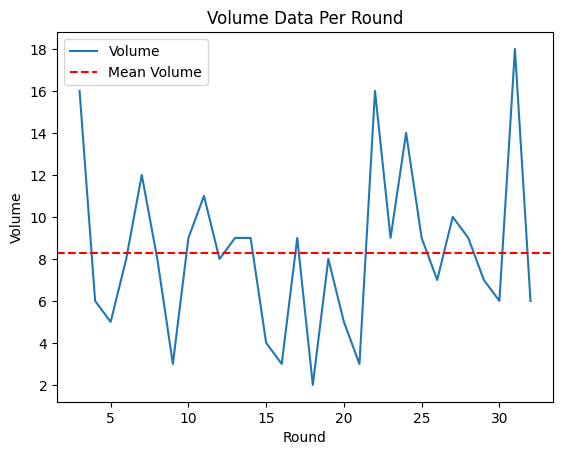

In [63]:


base_sub = subjects[0]  # Assuming subjects is a defined list or array

volume = round_data[round_data['participant.code'] == base_sub]['group.volume'].reset_index(drop=True)  # Reset index without keeping the old index

mean_volume = np.mean(volume[3:])

plt.plot(volume.index[3:], volume[3:], label='Volume')  # Use volume.index as x-values
plt.axhline(mean_volume, color='red', linestyle='--', label='Mean Volume')
plt.xlabel('Round')
plt.ylabel('Volume')
plt.title(f'Volume Data Per Round')
plt.legend()
plt.show()


## Sell vs Buy Orders Simple Count

In [90]:
sell_orders = []
min_sell_price = []
buy_orders = []
max_buy_price = []
market_price = []
for round in np.unique(order_data['round_number']):
    df = order_data[order_data['round_number']== round]
    sell_orders.append(np.sum(df[df['type'] == 'SELL']['quantity']))
    min_sell_price.append(np.min(df[df['type'] == 'SELL']['price']))
    buy_orders.append(np.sum(df[df['type'] == 'BUY']['quantity']))
    max_buy_price.append(np.max(df[df['type'] == 'BUY']['price']))
    market_price.append(np.unique(df['market_price']))





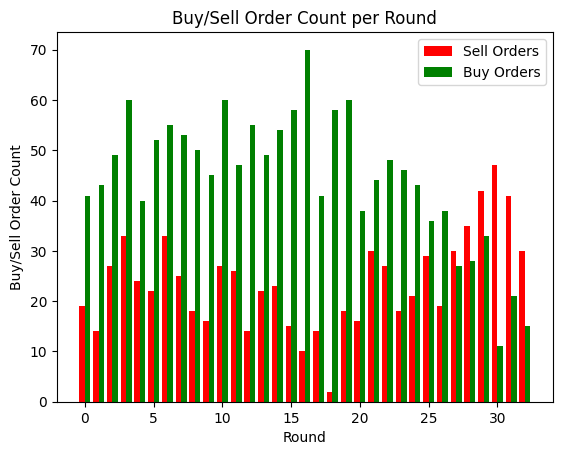

In [70]:
num_rounds = len(sell_orders)  # Assuming both sell_orders and buy_orders have the same length
rounds = np.arange(num_rounds)


plt.bar(rounds - 0.2, sell_orders, width=0.4, label='Sell Orders', color='red')  # Shift bars to the left, color red
plt.bar(rounds + 0.2, buy_orders, width=0.4, label='Buy Orders', color='green')   # Shift bars to the right, color green
plt.xlabel('Round')
plt.ylabel('Buy/Sell Order Count')
plt.title('Buy/Sell Order Count per Round')
plt.legend()
plt.show()


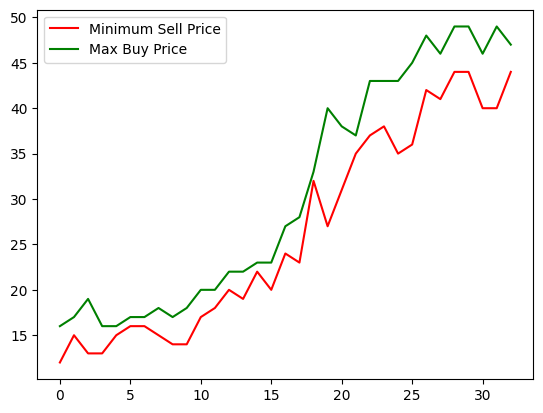

In [84]:
plt.plot(min_sell_price, label='Minimum Sell Price', color = 'red')
plt.plot(max_buy_price, label='Max Buy Price', color = 'green')
plt.legend()
plt.show()


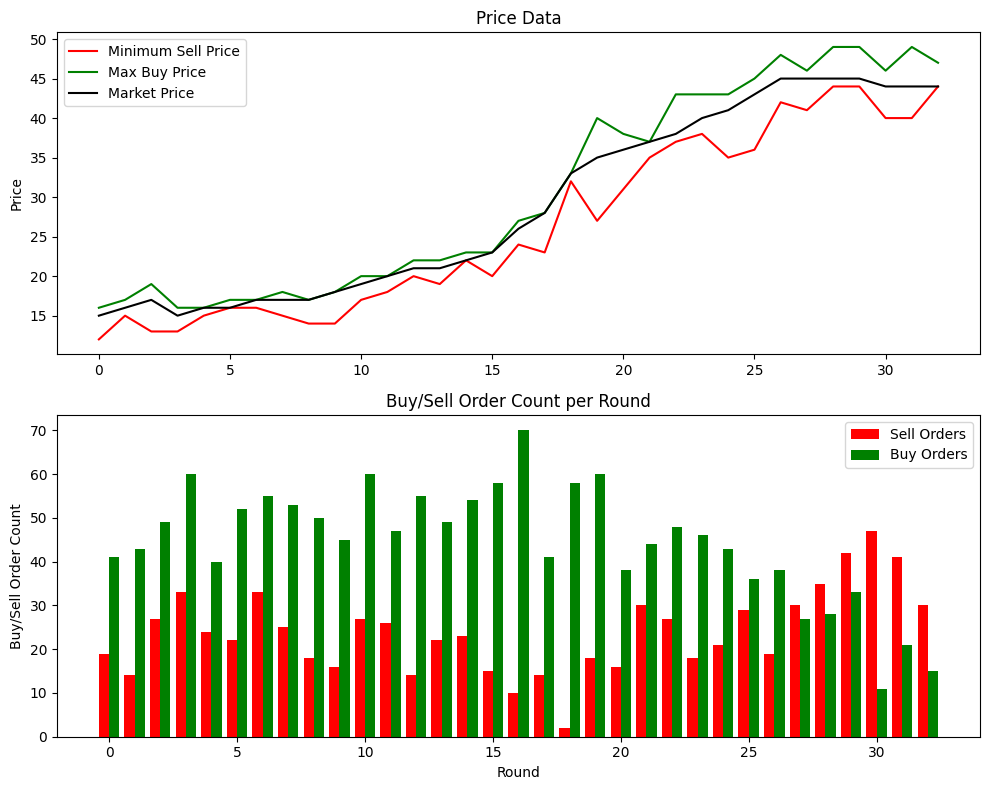

In [92]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Line plots
ax1.plot(min_sell_price, label='Minimum Sell Price', color='red')
ax1.plot(max_buy_price, label='Max Buy Price', color='green')
ax1.plot(market_price, label='Market Price', color ='black')
ax1.set_ylabel('Price')
ax1.set_title('Price Data')
ax1.legend()

# Bar plots
ax2.bar(rounds - 0.2, sell_orders, width=0.4, label='Sell Orders', color='red')
ax2.bar(rounds + 0.2, buy_orders, width=0.4, label='Buy Orders', color='green')
ax2.set_xlabel('Round')
ax2.set_ylabel('Buy/Sell Order Count')
ax2.set_title('Buy/Sell Order Count per Round')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

## Final Round Analysis

In [111]:
last_round_df = round_data[round_data['subsession.round_number'] == 33]
last_orders_df = order_data[order_data['round_number'] == 33]

## Final Share Distribution

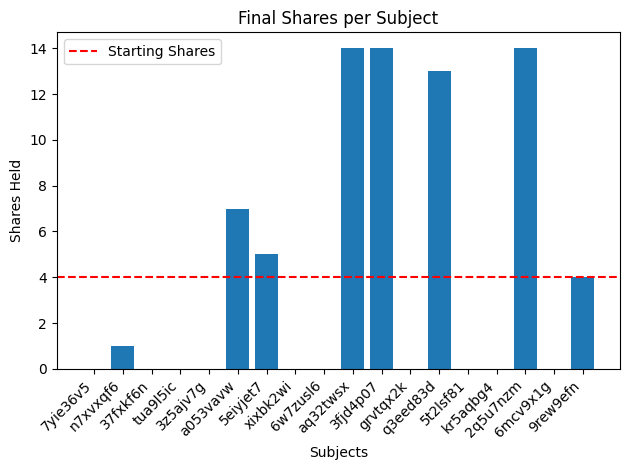

In [122]:
plt.bar(last_round_df['participant.code'], last_round_df['player.shares_result'])
plt.xlabel('Subjects')
plt.ylabel('Shares Held')
plt.title('Final Shares per Subject')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.axhline(np.mean(last_round_df['player.shares_result']), color='red', linestyle='--', label='Starting Shares')
plt.legend()
plt.tight_layout()
plt.show()

## Trade Amount Distribution

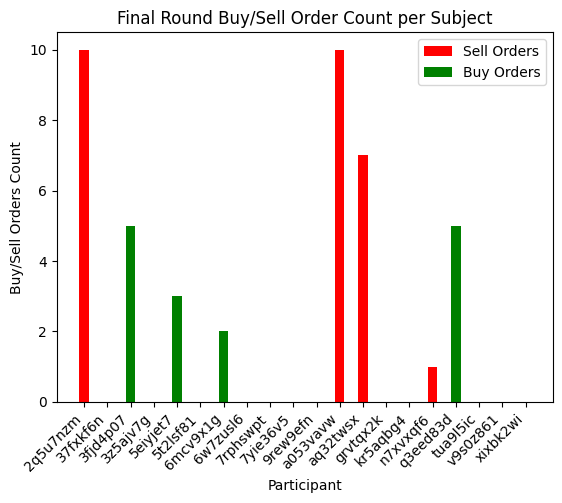

In [120]:
last_round_orders = []
for subject in subjects:
    df = last_orders_df[last_orders_df['participant'] == subject]
    last_sell_count = np.sum(df[df['type'] == 'SELL']['quantity'])
    last_buy_count = np.sum(df[df['type'] == 'BUY']['quantity'])
    last_round_orders.append((last_sell_count, last_buy_count)) 

# Extracting sell and buy counts from last_round_orders
sell_orders = [order[0] for order in last_round_orders]
buy_orders = [order[1] for order in last_round_orders]

# Bar plots
plt.bar(subjects, sell_orders, width=0.4, label='Sell Orders', color='red')
plt.bar(subjects, buy_orders, width=0.4, label='Buy Orders', color='green')
plt.xlabel('Participant')
plt.ylabel('Buy/Sell Orders Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Final Round Buy/Sell Order Count per Subject')
plt.legend()
plt.show()


## Max Sell Count

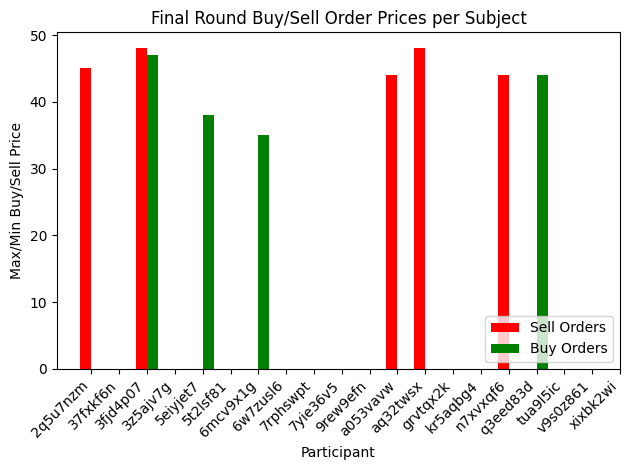

In [127]:
last_order_price = []
bar_width = 0.4  # Width of each bar
index = np.arange(len(subjects))  # Index for the x-coordinates of the bars

for subject in subjects:
    df = last_orders_df[last_orders_df['participant'] == subject]
    last_min_sell = np.min(df[df['type'] == 'SELL']['price'])
    last_min_buy = np.max(df[df['type'] == 'BUY']['price'])
    last_order_price.append((last_min_sell, last_min_buy)) 

# Extracting sell and buy prices from last_order_price
sell_price = [order[0] for order in last_order_price]
buy_price = [order[1] for order in last_order_price]

# Bar plots
plt.bar(index - bar_width/2, sell_price, width=bar_width, label='Sell Orders', color='red')
plt.bar(index + bar_width/2, buy_price, width=bar_width, label='Buy Orders', color='green')
plt.xlabel('Participant')
plt.ylabel('Max/Min Buy/Sell Price')
plt.xticks(index, subjects, rotation=45, ha='right')  # Place x-ticks at the center of each group of bars
plt.title('Final Round Buy/Sell Order Prices per Subject')
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Bid Ask Spread vs Risk

In [165]:
risk = []
bid_ask_list = []
for round in range(34)[1:]:
    round_info = round_data[round_data['subsession.round_number'] == round]
    order_round_info = order_data[order_data['round_number'] == round]

    risk.append(np.mean(round_info['player.dose_r']))

    bid_ask = []
    for subject in subjects:
        df = order_round_info[order_round_info['participant'] == subject]
        round_ask = np.min(df[df['type'] == 'SELL']['price'])
        round_bid = np.max(df[df['type'] == 'BUY']['price'])
        if not np.isnan(round_ask) and not np.isnan(round_bid):
            spread = round_ask - round_bid
            bid_ask.append(spread)

    avg_bid_ask = np.mean(bid_ask)
    bid_ask_list.append(avg_bid_ask)



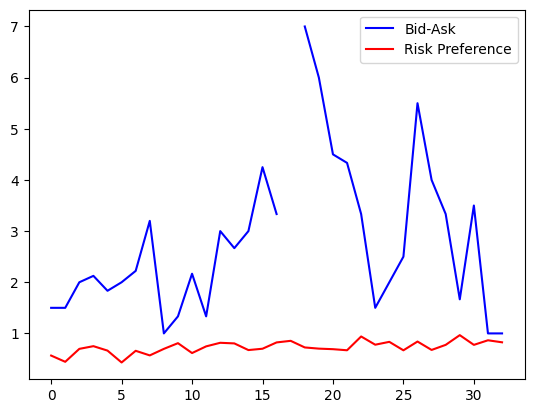

In [168]:
plt.plot(bid_ask_list, label='Bid-Ask', color = 'blue')
plt.plot(risk, label='Risk Preference', color = 'red')
plt.legend()
plt.show()


In [ ]:
last_order_price = []
bar_width = 0.4  # Width of each bar
index = np.arange(len(subjects))  # Index for the x-coordinates of the bars

for subject in subjects:
    df = last_orders_df[last_orders_df['participant'] == subject]
    last_min_sell = np.min(df[df['type'] == 'SELL']['price'])
    last_min_buy = np.max(df[df['type'] == 'BUY']['price'])
    last_order_price.append((last_min_sell, last_min_buy)) 

# Extracting sell and buy prices from last_order_price
sell_price = [order[0] for order in last_order_price]
buy_price = [order[1] for order in last_order_price]

# Bar plots
plt.bar(index - bar_width/2, sell_price, width=bar_width, label='Sell Orders', color='red')
plt.bar(index + bar_width/2, buy_price, width=bar_width, label='Buy Orders', color='green')
plt.xlabel('Participant')
plt.ylabel('Max/Min Buy/Sell Price')
plt.xticks(index, subjects, rotation=45, ha='right')  # Place x-ticks at the center of each group of bars
plt.title('Final Round Buy/Sell Order Prices per Subject')
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()